# Predviđanje otkazivanja hotelskih rezervacija

Podaci korišteni za projekt javno su dostupni na stranici 'kaggle.com'.



## Kratki sadržaj


## Uvod

Velik problem u ugostiteljstvu predstavlja otkazivanje rezervacija čime se stvaraju slobodna mjesta koja više nitko ne stigne popuniti.
U tim situacijama hotel gubi na prihodu bilo da rezervirane sobe ostaju prazne ili da se iznajmljuju po nižim cijenama. S ciljem da ipak prodaju sobu, neki hoteli dodatnim oglašavanjem prilaze problemu, no i to ima svoju cijenu. Zbog svega toga, predviđanje kad bi se otkazivanje moglo dogoditi pokazalo se kao najbolja je metoda za rješavanje spomenutih problema. 
Zahvaljujući podatkovnoj analizi i algoritmima strojnog učenja moguće je dobiti bolji uvid u podatke te treniranjem modela doznati koja je vjerojatnost da će sljedeća, dotad neviđena rezervacija biti otkazana. Jednom kad to znamo, možemo omogućiti rezervaciju više soba no što imamo, obzirom da jedan dio gostiju neće doći. 


## Predprocesiranje 

Okvirni pregled podataka i čišćenjem našeg skupa. 

Nužne operacije nad podacima prije analize:
* obrada null vrijednosti


## Eksploratorna analiza podataka

Radi boljeg uvida u poslovanje hotela i izgradnje početnih pretpostavki što i u kojoj mjeri utječe na otkazivanje.

Pitanja na koja ćemo odgovoriti su:

* koji mjesec hoteli primaju najviše rezervacija?
* otkud dolazi većina gostiju?
* koliko dugo gosti ostaju u hotelu?
* kako prosječna cijena sobe varira tijekom godine?
* kakva je raspodjela rezervacija u odnosu na tržište?
* koji tip gostiju je najzastupljeniji?
* koliko često gosti imaju posebne zahjteve?
* kolika je učestalost ponovljenih gostiju?

Zatim ćemo istraživati utjecaje različitih značajki na ciljnu varijablu:

* koja je raspodjela otkazanih rezervacija po hotelima?
* za koji mjesec je najveća vjerojatnost da će rezervacija biti otkazana?
* gosti iz koje države su najviše skloni otkazivanju?
* koje tržište predstavlja najveći rizik za poslovanje?
* koje značajke imaju najviše utjecaja na otkazivanje?


## Važnost značajki i izgradnja modela

Ovaj dio odnosi se na dodatnu pripremu podataka prije treniranja modela i sam postupak treniranja

* pretvorba kategoričkih značajki u numeričke
* uklanjanje redundatnih značajki zbog mogućnosti prenaučenosti
* skaliranje značajki
* odabir algoritama strojnog učenja korištenih za treniranje
* treniranje


## Analiza rezultata 

* koji model daje najveću točnost?
* mogući problemi kod najboljeg modela
* optimizacija hiperparametara
* prikaz te analiza klasifikacijskih izvještaja naučenih modela 
* grafički prikaz bitnosti značajki pridjeljenih od strane najboljeg modela




In [1]:
# Ignoriranje upozorenja 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Unos korištenih bibilioteka

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Učitavanje podataka

hotel_data = pd.read_csv('C:/Data/hotel_bookings.csv')

In [4]:
# Okvirni pregled
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [5]:
print('Postotci NULL vrijednosti po atributima sortirano:')
pd.options.display.float_format = "{:,.6f}".format
hotel_data.isnull().mean().sort_values(axis=0, ascending=False)[:8] * 100

Postotci NULL vrijednosti po atributima sortirano:


company              94.306893
agent                13.686238
country               0.408744
children              0.003350
reserved_room_type    0.000000
assigned_room_type    0.000000
booking_changes       0.000000
deposit_type          0.000000
dtype: float64

### Obrada NULL vrijednosti:
    
* obzirom da je atribut "company" skoro uvijek NULL, njega ćemo izbrisati iz dataseta
* naredba hotel_data['agent'].unique() daje raspon od 1 do preko 500 ID-eva različitih agenata
    * kako bi se riješili NULL vrijednosti, na njihovo mjesto stavit ćemo ID 0
* NULL vrijednosti zemalja zamijenit ćemo najčešćom zemljom
* obzirom da zapisa gdje je broj djece NULL ima jako malo, te zapise možemo obrisati

In [6]:
hotel_data=hotel_data.drop(['company'], axis =1)
hotel_data['agent'] = hotel_data['agent'].fillna(0.0)
hotel_data['country'] = hotel_data['country'].fillna(hotel_data['country'].mode().index[0])
hotel_data.dropna(subset = ['children'], inplace=True)

## Eksploratorna analiza

* koji mjesec hoteli primaju najviše rezervacija?
* otkud dolazi većina gostiju?



Text(0, 0.5, 'Broj rezervacija')

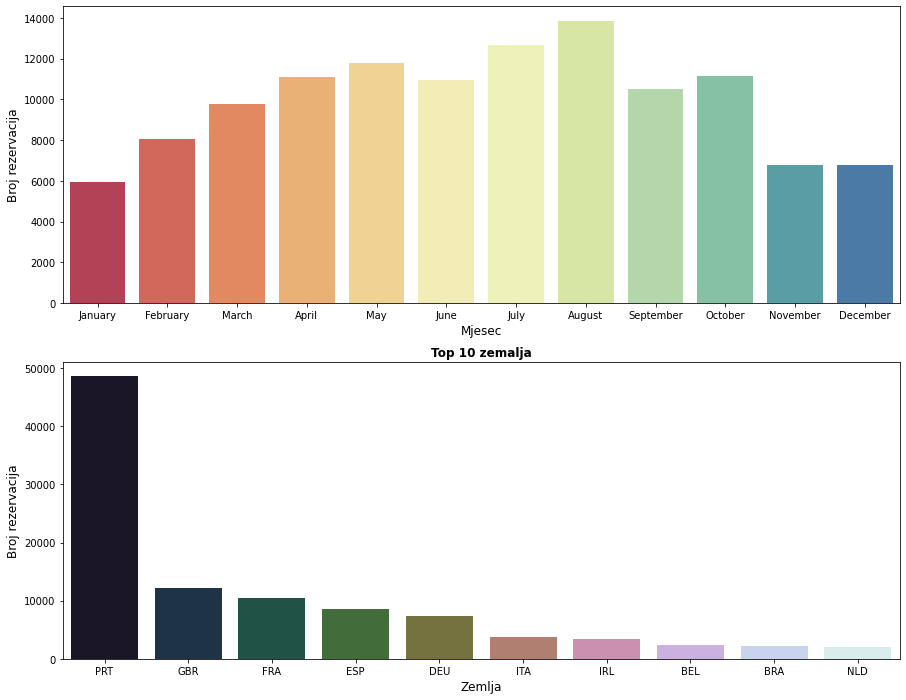

In [7]:

plt.figure(figsize=(15,12))
plt.subplot(2, 1, 1)
sns.countplot(x='arrival_date_month', data=hotel_data,
              order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                    'October', 'November', 'December'], palette='Spectral')
plt.xlabel('Mjesec', fontsize=12)
plt.ylabel('Broj rezervacija', fontsize=12)


plt.subplot(2, 1, 2)
sns.countplot(x='country', data=hotel_data,
              order=pd.value_counts(hotel_data['country']).iloc[:10].index, palette="cubehelix")
plt.title('Top 10 zemalja', weight='bold')
plt.xlabel('Zemlja', fontsize=12)
plt.ylabel('Broj rezervacija', fontsize=12)




* koliko dugo gosti ostaju u hotelu?




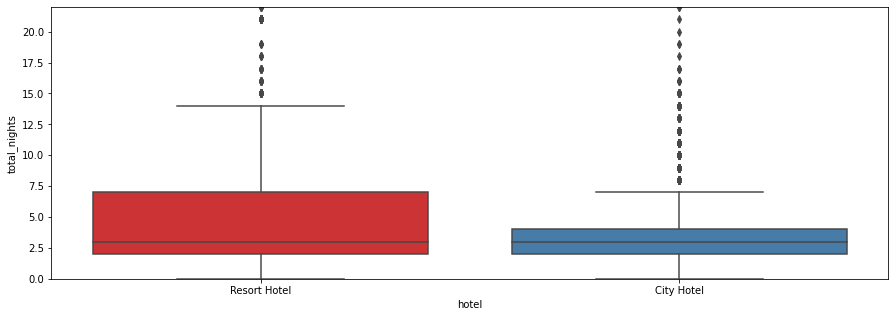

In [8]:
actual_guests = hotel_data[hotel_data['is_canceled'] == 0]
actual_guests['total_nights'] = actual_guests['stays_in_week_nights'] + actual_guests['stays_in_weekend_nights']

plt.figure(figsize = (15, 5))
plt.ylim(0, 22)
sns.boxplot(x="hotel", y = "total_nights", data = actual_guests,  palette = 'Set1');



* kako prosječna cijena sobe u hotelima varira tijekom godine?


Text(0, 0.5, 'Cijena u eurima')

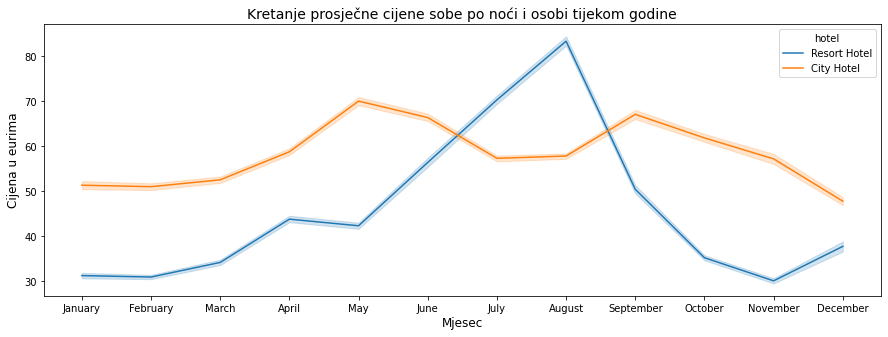

In [9]:
plt.figure(figsize = (15, 5))

actual_guests = hotel_data[hotel_data['is_canceled'] == 0]
actual_guests['num_of_guests'] = actual_guests['adults'] + actual_guests['children']
actual_guests = actual_guests[actual_guests.num_of_guests != 0]
actual_guests['adr_pp'] = actual_guests['adr'] / actual_guests['num_of_guests']

# order by month
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
actual_guests['arrival_date_month'] = pd.Categorical(actual_guests['arrival_date_month'], categories=ordered_months, ordered=True)

plt.title('Kretanje prosječne cijene sobe po noći i osobi tijekom godine', fontsize=14)
sns.lineplot(x='arrival_date_month', y='adr_pp', hue='hotel', data=actual_guests)
plt.xlabel('Mjesec', fontsize=12)
plt.ylabel('Cijena u eurima', fontsize=12)

* kakva je raspodjela rezervacija u odnosu na tržište?
* koji tip gostiju je najzastupljeniji?


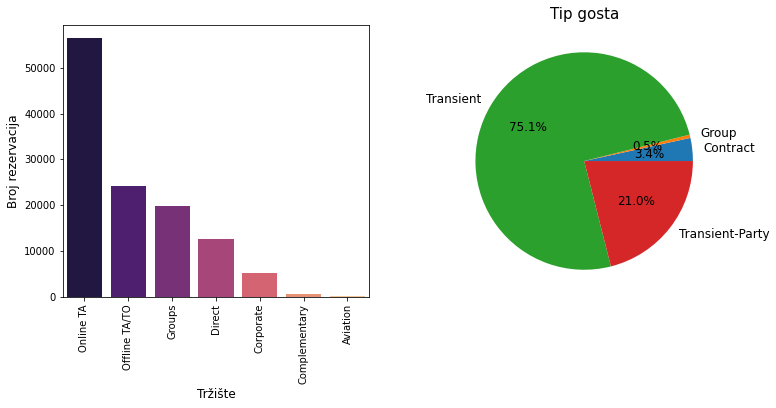

In [10]:
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
sns.countplot(hotel_data['market_segment'], palette='magma', 
              order=pd.value_counts(hotel_data['market_segment']).index)
plt.xlabel('Tržište', fontsize=12)
plt.ylabel('Broj rezervacija', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
df = hotel_data.groupby('customer_type').size()
df.plot.pie(autopct='%.1f%%', fontsize=12);
plt.title('Tip gosta', fontsize=15)
plt.ylabel('')
plt.subplots_adjust(right=0.5)



* koliko često gosti imaju posebne zahjteve?
* kolika je učestalost ponovnih gostiju?

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

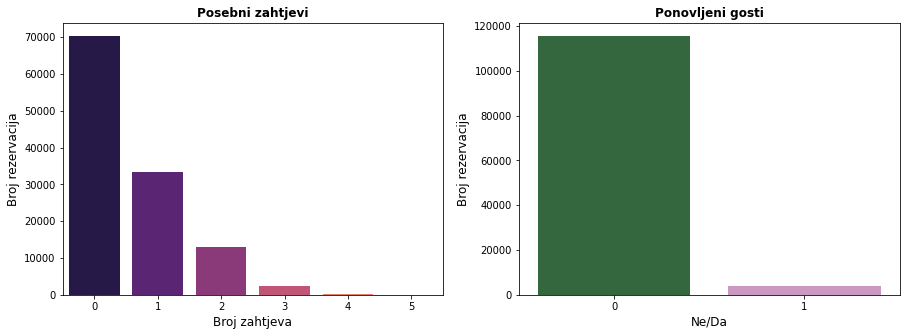

In [11]:


plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(hotel_data['total_of_special_requests'], palette='magma', 
              order=pd.value_counts(hotel_data['total_of_special_requests']).index)
plt.title('Posebni zahtjevi', weight='bold')
plt.xlabel('Broj zahtjeva', fontsize=12)
plt.ylabel('Broj rezervacija', fontsize=12)
plt.xticks(rotation=360)


plt.subplot(1, 2, 2)
sns.countplot(hotel_data['is_repeated_guest'], palette='cubehelix', 
              order=pd.value_counts(hotel_data['is_repeated_guest']).index)
plt.title('Ponovljeni gosti', weight='bold')
plt.xlabel('Ne/Da', fontsize=12)
plt.ylabel('Broj rezervacija', fontsize=12)
plt.xticks(rotation=360)



## Sada istražujemo utjecaje različitih značajki na ciljnu varijablu

* koja je raspodjela otkazanih rezervacija po hotelima?


(array([0, 1]), [Text(0, 0, 'City Hotel'), Text(1, 0, 'Resort Hotel')])

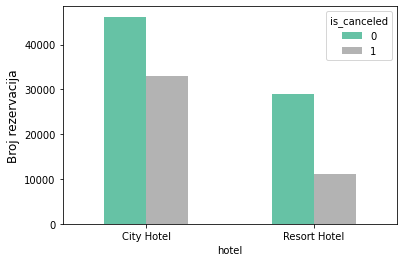

In [12]:
group_data = hotel_data.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)
group_data.plot(kind='bar', stacked=False, cmap='Set2')
plt.ylabel("Broj rezervacija", fontsize=12)
plt.xticks(rotation=360)


* za koji mjesec je najveća vjerojatnost da će rezervacija biti otkazana?
* gosti iz koje države su najviše skloni otkazivanju?


Text(0, 0.5, 'Otkazivanja [%]')

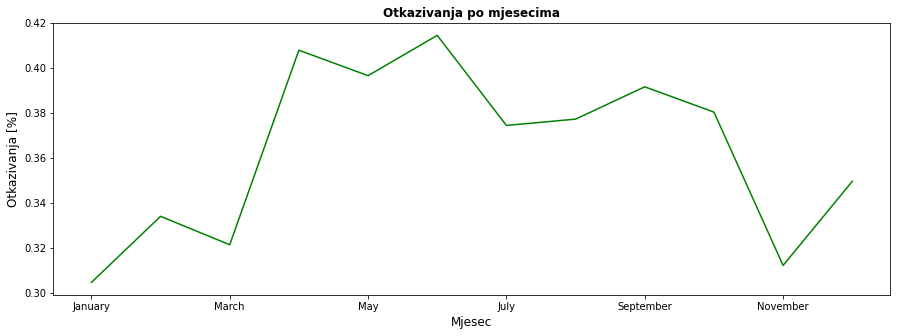

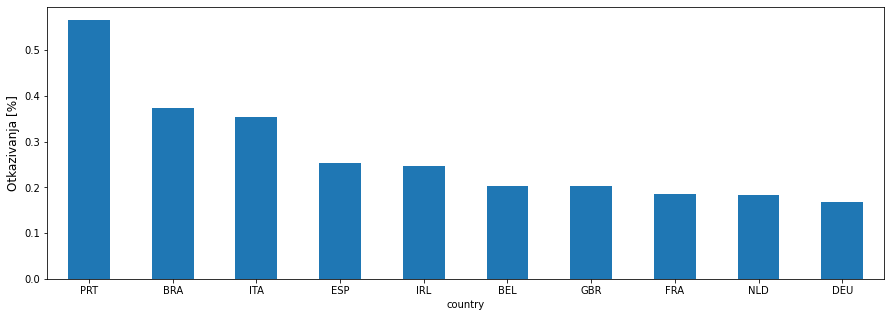

In [13]:
df = hotel_data.groupby('arrival_date_month')['is_canceled'].agg('mean') \
.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December'])
df.plot(kind='line', figsize=(15, 5), color='g', legend=None)

plt.title('Otkazivanja po mjesecima', weight='bold')
plt.xlabel('Mjesec', fontsize=12)
plt.ylabel('Otkazivanja [%]', fontsize=12)
plt.xticks(rotation=360)

top_10_countries = hotel_data['country'].value_counts()[:10].index.tolist()
df = hotel_data[hotel_data['country'].isin(top_10_countries)]

df2 = df.groupby('country')['is_canceled'] \
.agg(['size', ('postotak_otkazanih', 'mean')]).sort_values(by='postotak_otkazanih', ascending=False)
df2.plot(kind='bar', y='postotak_otkazanih', legend=False, figsize=(15, 5))
plt.xticks(rotation=360)
plt.ylabel('Otkazivanja [%]', fontsize=12)



* koje tržište predstavlja najveći rizik za poslovanje?
* koje značajke imaju najviše utjecaja na otkazivanje?

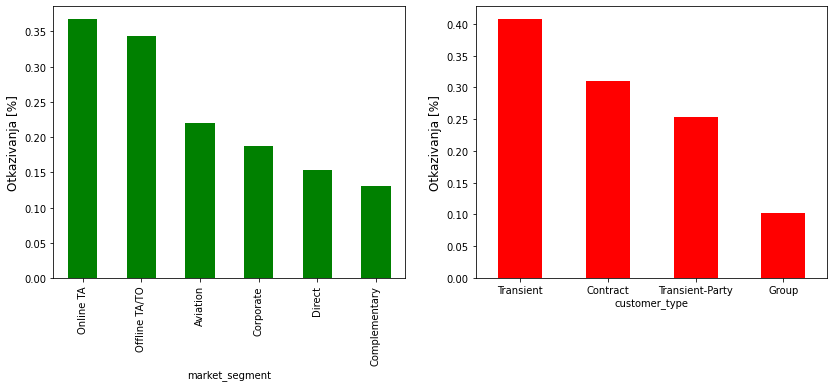

In [14]:
df = hotel_data.groupby('market_segment')['is_canceled'] \
.agg(['size', ('postotak_otkazanih', 'mean')]).sort_values(by='postotak_otkazanih', ascending=False) 

df = df[1:]
df.plot(kind='bar', y='postotak_otkazanih', color='g', figsize=(15, 5), ax = plt.subplot(1, 2, 1), legend=None)
plt.ylabel('Otkazivanja [%]', fontsize=12)

df = hotel_data.groupby('customer_type')['is_canceled'] \
.agg(['size', ('postotak_otkazanih', 'mean')]).sort_values(by='postotak_otkazanih', ascending=False)

df.plot(kind='bar', y='postotak_otkazanih', color='r', figsize=(10, 5), ax = plt.subplot(1, 2, 2), legend=None)
plt.xticks(rotation=360)
plt.ylabel('Otkazivanja [%]', fontsize=12)
plt.subplots_adjust(right=1.2)






Eksploratorna analiza podataka dala je sljedeće uvide:
* glede hotela, veću stopu otkazivanja nalazimo u gradskim, tj. 'City' hotelima.
* mjesec u kojem se prosječno najviše otkazuje je lipanj
* gosti najskloniji otkazivanju su Portugalci, odmah iza njih nalaze se Brazilci i Talijani
* online rezervacije od svih vrsta rezervacija najčešće završavaju otkazanima
* glede gostiju, transient tip je najskloniji otkazivanju 

Sad bismo mogli dalje tako svaku značajku posebno analizirati i prikazati da i ona u određenoj mjeri utječe na ciljnu varijablu. Međutim bolja strategija bila bi utvrditi koje značajke utječu najviše pa taj odnos vizualizirati.

Prije toga potrebno je promijeniti strukturu podataka, tj. pretvoriti kategorijske značajke u numeričke.
To će nam kasnije biti bitno i kod treniranja modela jer algortimi strojnog učenja koriste samo numeričke podatke.

Utvrdimo dakle sada važnost značajki te pripremimo podatke za treniranje.

## Važnost značajki

* pretvorba kategoričkih značajki u numeričke


In [15]:
hotel_data['agent']= hotel_data['agent'].astype(int)
hotel_data['country']= hotel_data['country'].astype(str)

cat_features = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
               'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type', 'reservation_status', 
                'reservation_status_date']

hotel_data_model = hotel_data.copy(deep=True)

le = LabelEncoder()
for feature in cat_features:
    hotel_data_model[feature] = le.fit_transform(hotel_data[feature])

#hotel_data_categorical = hotel_data[cat_features]
#hotel_data_categorical.info()

#hotel_data_numerical= hotel_data.drop(cat_features, axis = 1)
#hotel_data_numerical.info()




* koje značajke imaju najviše utjecaja na otkazivanje?
    * značajke koje su pozitivno korelirane s ciljnom varijablom

In [16]:
cancel_corr = hotel_data_model.corr()['is_canceled']

# sortirane značajke koje pozitivno utječu na otkazivanje
positive_corr = cancel_corr[cancel_corr.values > 0][1:]
positive_corr.sort_values(ascending=False)


deposit_type               0.468665
lead_time                  0.293177
country                    0.271529
distribution_channel       0.167544
previous_cancellations     0.110140
adults                     0.059990
market_segment             0.059314
days_in_waiting_list       0.054193
adr                        0.047622
stays_in_week_nights       0.024771
arrival_date_year          0.016732
arrival_date_week_number   0.008132
children                   0.005048
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Otkazivanja [%]')

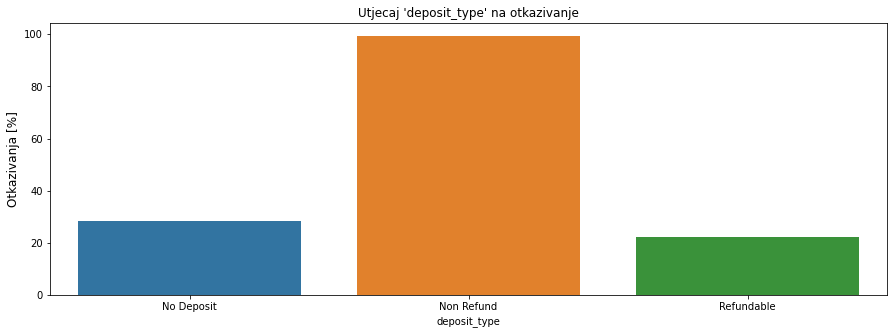

In [17]:
# group data for deposit_type:
plt.figure(figsize=(15,5))
df = hotel_data.groupby('deposit_type')['is_canceled']. \
agg(['size', ('postotak_otkazanih', 'mean')]).sort_values(by='size', ascending=False)
sns.barplot(x=df.index, y=df['postotak_otkazanih'] * 100)
plt.title("Utjecaj 'deposit_type' na otkazivanje")
plt.xticks(rotation=360)
plt.ylabel('Otkazivanja [%]', fontsize=12)


Značajka 'deposit_type' i ciljna značajka povezane u su nelogičnom smislu. Iz grafa je vidljivo da gosti
koji su platili cijeli iznos unaprijed u 99% slučajeva otkazuju rezervaciju. Glede te značajke ili
su podaci krivi ili je njihov opis kriv; u svakom slučaju tu ćemo značajku također izostaviti prilikom treniranja modela.


* kako lead_time utječe na cijnu značajku?
    * lead_time predstavlja vremenski period od trenutka rezervacije do početka rezerviranog termina


Text(0, 0.5, 'lead_time')

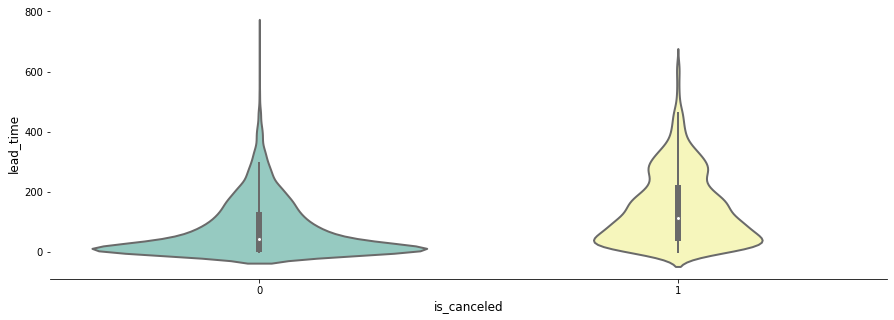

In [18]:
plt.figure(figsize=(15,5))
sns.violinplot(x='is_canceled', y ='lead_time', data=hotel_data, palette="Set3", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)

plt.xlabel('is_canceled', fontsize=12)

plt.ylabel('lead_time', fontsize=12)





Ovdje je dan vizualni prikaz kako 'lead_time' utječe na to hoće li rezervacija biti otkazana ili ne.
Iz grafa je vidljivo da je uz otkazivanje visoko povezan i duži 'lead_time' koji predstavlja vremenski period od trenutka rezervacije do početka rezerviranog termina.

To jedna od bitnijih informacija koje utječu na konačnu predikciju stoga ćemo je obavezno zadržati u datasetu.


* značajke koje su negativno korelirane s ciljnom varijablom

In [19]:
negative_corr = cancel_corr[cancel_corr.values < 0]
negative_corr.sort_values(ascending=True)


reservation_status               -0.917191
total_of_special_requests        -0.234706
required_car_parking_spaces      -0.195492
assigned_room_type               -0.176025
reservation_status_date          -0.162077
booking_changes                  -0.144371
hotel                            -0.136505
is_repeated_guest                -0.084788
customer_type                    -0.068210
reserved_room_type               -0.061284
previous_bookings_not_canceled   -0.057355
agent                            -0.046755
babies                           -0.032488
meal                             -0.017655
arrival_date_day_of_month        -0.006084
stays_in_weekend_nights          -0.001783
arrival_date_month               -0.001435
Name: is_canceled, dtype: float64

Analizirajmo drugu po redu.

* kakva je raspodjela otkazanih rezervacija s obzirom na ukupan broj posebnih zahtjeva?



Text(0, 0.5, 'Otkazivanja [%]')

<Figure size 720x720 with 0 Axes>

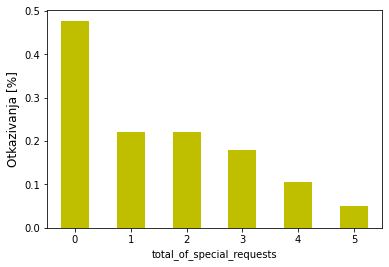

In [20]:
plt.figure(figsize=(10, 10))
hotel_data.groupby('total_of_special_requests')['is_canceled'] \
.agg(['size', ('postotak_otkazanih', 'mean')]).sort_values(by='size', ascending=False) \
.plot(kind='bar', y='postotak_otkazanih', color='y', legend=None)
plt.xticks(rotation=360)
plt.ylabel('Otkazivanja [%]', fontsize=12)

## Uklanjanje redundatnih značajki zbog mogućnosti prenaučenosti

Prije treniranja modela neke značajke brišemo iz podataka kako bismo učinili da model bolje generalizira te spriječili prenaučenost.

* 'arrival_date_year'
* 'assigned_room_type'
* 'reservation_status'
    * visoka korelacija 'reservation_status' i 'is_canceled' može biti uzrok prenaučenosti
* 'reservation_status_date'
    * obzirom da je 'reservation_status_date' datum, ne možemo je koristiti prilikom treniranja
* 'country'
    * iako dosta indikativna značajka za konačan ishod, smanjuje generalizacijsku moć modela



In [21]:
hotel_data_model = hotel_data_model.drop(['reservation_status', 'deposit_type',
                                    'arrival_date_year', 'assigned_room_type',
                                    'reservation_status_date', 'country'], axis=1)


Podijelimo podatke u dva skupa u omjeru:
* 75% train
* 25% test

te ih skalirajmo.

In [22]:
y = hotel_data_model['is_canceled']
X = hotel_data_model.drop(['is_canceled'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



* odabir algoritama i treniranje modela


In [23]:
algorithms = [('Logistic Regression', LogisticRegression(solver = 'liblinear')),
              ('Neural Network', MLPClassifier()),
              ('Gaussian Naive Bayes', GaussianNB()),
              ('Decision Tree', DecisionTreeClassifier()),
              ('Random Forest', RandomForestClassifier())]

reports = []

for x in algorithms:
    name, alg = x
    model = alg.fit(X_train, y_train)
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    
    print("Model: {} Accuracy score: {}".format(name, accuracy_score(y_test,y_pred)))
    
    cr = classification_report(y_test, y_pred)
    reports.append((name, cr))
   

Model: Logistic Regression Accuracy score: 0.7532080276074647
Model: Neural Network Accuracy score: 0.8271853117566255
Model: Gaussian Naive Bayes Accuracy score: 0.6278017891245351
Model: Decision Tree Accuracy score: 0.8111703018728851
Model: Random Forest Accuracy score: 0.8651120715649814


## Analiza rezultata

* koji model daje najveću točnost?
    * najveću točnost ostvaruje Random Forest Classifier
    
    
* kakve rezultate daje model s optimiranim hiperparametrima?


In [24]:
# RandomForestClassifier sa optimiranim hiperparametrima:
rf_opt = RandomForestClassifier(n_estimators=160, max_features=0.4, min_samples_split=2, 
                                n_jobs=-1, random_state=0)

model = rf_opt.fit(X_train, y_train)
y_prob = rf_opt.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)
    
print("Model: {} Accuracy score: {}".format("Random Forest", accuracy_score(y_test,y_pred)))


Model: Random Forest Accuracy score: 0.8651790799745368


Pronalazak optimalnih parametara za naš najbolji model nije dao bolji rezultat obzirom da kod defaultnog modela
nema granice za maksimalnu dubinu stabla. 
Povećanjem maksimalne dubine dobivamo bolju točnost no možda riskiramo da dobijemo prenaučen model.

Pogledajmo klasifikacijske izvještaje naučenih modela.

In [25]:
for r in reports:
    name, report = r
    print(name, '\n', report)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.76      0.88      0.82     18714
           1       0.72      0.55      0.62     11133

    accuracy                           0.75     29847
   macro avg       0.74      0.71      0.72     29847
weighted avg       0.75      0.75      0.74     29847

Neural Network 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87     18714
           1       0.81      0.70      0.75     11133

    accuracy                           0.83     29847
   macro avg       0.82      0.80      0.81     29847
weighted avg       0.83      0.83      0.82     29847

Gaussian Naive Bayes 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77     18714
           1       1.00      0.00      0.00     11133

    accuracy                           0.63     29847
   macro avg       0.81      0.50      0.39     29847
weighted avg

Iz klasifikacijskih izvještaja za najbolji model bitno je uočiti da oko 24% rezervacija koje su otkazane model nije uspio tako klasificirati. U tom smjeru postoji prostor za napredak.

Generalno, točnost kao omjer točnih predikcija naspram ukupnog broja predikcija iznosi 87%.



Text(0.5, 0, 'Bitnosti značajki [%]')

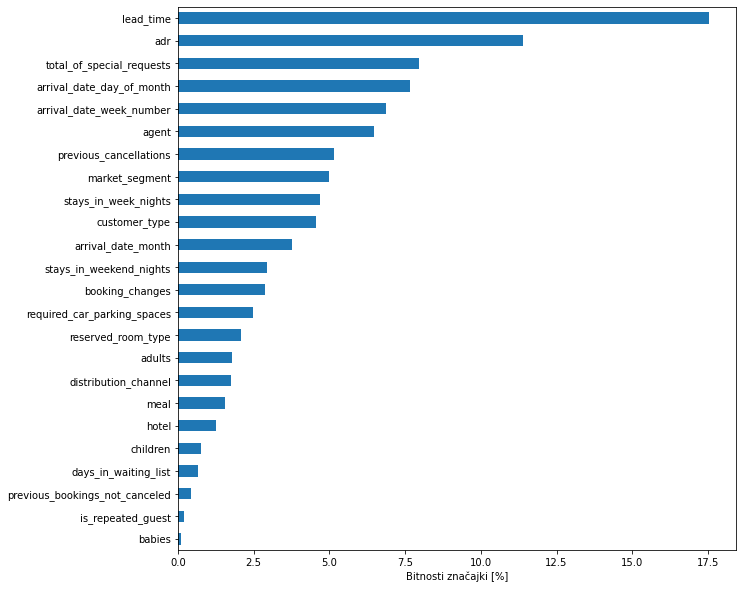

In [26]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

pd.DataFrame(data = rf_model.feature_importances_ * 100,
                   columns = ['bitnosti'],
                   index = X.columns).sort_values('bitnosti', ascending = True) \
                   .plot(kind = 'barh', legend=False, figsize=(10, 10))

plt.xlabel("Bitnosti značajki [%]")

Neočekivano iz tablica korelacije značajki, model je pridijelio veliku težinu značajki 'adr' koja predstavlja prosječnu 
cijenu boravka po danu za određenu rezervaciju. Intuitivno i ima smisla da oni koji su više rezervaciju platili češće otkazuju, no to nije bilo očito iz tablice korelacije.

Da je to uistinu tako, svjedoči i sljedeći grafički prikaz:

(0.0, 100.0)

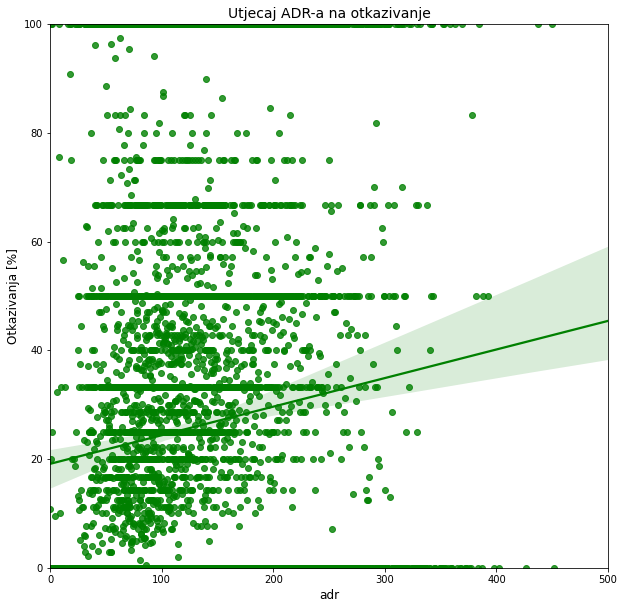

In [27]:
df = hotel_data.groupby('adr')['is_canceled'].describe()
plt.figure(figsize=(10, 10))
plt.title("Utjecaj ADR-a na otkazivanje", fontsize=14)
plt.xlabel("ADR", fontsize=12)
plt.ylabel("Otkazivanja [%]", fontsize=12)
sns.regplot(x=df.index, y=df['mean'].values * 100, color='g')
plt.xlim(0, 500)
plt.ylim(0, 100)


# možda napravit rangeove 0-100 pa 100-200 itd pa analizirat cancelation

### Završni komentari

* prije treniranja bilo kojeg modela nužno je provesti analizu i pripremu podataka
* dobiven je zadovoljavajući model iako nije provedena analiza optimalnih parametara